In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data2=pd.read_excel("Demo_metabolic.xlsx", engine='openpyxl')
dataap=pd.read_excel("Demo_patient_week1_23.12.xlsx", engine='openpyxl')

data2 = pd.DataFrame(data2.iloc[:200, :3])
dataap1 = pd.DataFrame(dataap.iloc[:200, :1])
dataap2 = pd.DataFrame(dataap.iloc[:200, 43:45])

# data2['Weight_adm']=data2['Weight_adm']/data2['Height']
# data2= pd.DataFrame(data2.iloc[:10, :2])

dataap=pd.concat([dataap1,dataap2],axis=1)

dataap.head()

,patient_id,LOS,outcome1
0,0001F70C-AA4C-46CC-8386-9A4D778B26BA,18.0,No
1,002B9175-E697-4308-904F-243B4074C224,9.0,No
2,002E7282-9C02-4D5C-8D3B-DDA2574ABCEF,5.0,No
3,0030B684-28EE-4076-B8D1-B0CEDB9413F3,2.0,No
4,004E2D79-7F96-431B-AA0E-3A6D5B90097D,4.0,No


In [56]:
data = pd.read_csv("Demo_Patient_level_feeding_Daily_19.11.csv",encoding='latin-1')
data = pd.DataFrame(data.iloc[:200, :])
data.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,9A4D778B26BA,635.580000,33.858000,1540.800000,82.080000,1540.800000,82.080000,1540.800000,82.080000,1540.800000,82.080000,1878.55,88.891,1526.40,57.6,1526.40000,57.600000
1,243B4074C224,983.200008,65.546667,1253.600016,83.573334,1620.000000,108.000000,1021.200036,68.080002,1431.000000,95.400000,1440.00,96.000,1440.00,96.0,1440.00000,96.000000
2,DDA2574ABCEF,1209.600024,80.640002,0.000000,0.000000,1359.710689,66.328712,1878.261696,125.217446,643.043760,42.869584,0.00,0.000,0.00,0.0,0.00000,0.000000
3,B0CEDB9413F3,1261.400000,47.600000,337.080000,12.720000,36.746660,1.386666,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.0,0.00000,0.000000
4,3A6D5B90097D,1114.186815,40.269895,1946.950636,96.729665,1896.193822,100.402857,1970.866173,76.641677,432.479894,16.319996,0.00,0.000,1290.02,58.3,134.97333,5.653333


In [57]:
#merg by id
mer=pd.merge(data2,data,left_on='patient_id',right_on='patient_id',how='left')
mer.head()

,patient_id,Weight_adm,Height,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,9A4D778B26BA,120.0,2.00,635.580000,33.858000,1540.800000,82.080000,1540.800000,82.080000,1540.800000,82.080000,1540.800000,82.080000,1878.55,88.891,1526.40,57.6,1526.40000,57.600000
1,243B4074C224,65.0,1.65,983.200008,65.546667,1253.600016,83.573334,1620.000000,108.000000,1021.200036,68.080002,1431.000000,95.400000,1440.00,96.000,1440.00,96.0,1440.00000,96.000000
2,DDA2574ABCEF,101.0,1.75,1209.600024,80.640002,0.000000,0.000000,1359.710689,66.328712,1878.261696,125.217446,643.043760,42.869584,0.00,0.000,0.00,0.0,0.00000,0.000000
3,B0CEDB9413F3,85.0,1.65,1261.400000,47.600000,337.080000,12.720000,36.746660,1.386666,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.0,0.00000,0.000000
4,3A6D5B90097D,70.0,1.75,1114.186815,40.269895,1946.950636,96.729665,1896.193822,100.402857,1970.866173,76.641677,432.479894,16.319996,0.00,0.000,1290.02,58.3,134.97333,5.653333


In [58]:
#onley kcal_day and protein_day
mer2 = pd.DataFrame(mer.iloc[:,3 :])

# normelize and concat

for col in mer2.columns:
    mer2[col] = mer2[col]/mer['Weight_adm']
    
mer = mer.iloc[:, :1]
lest=pd.concat([mer,mer2],axis=1)
lest.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,9A4D778B26BA,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000
1,243B4074C224,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923
2,DDA2574ABCEF,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,B0CEDB9413F3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3A6D5B90097D,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762


In [59]:
dataap=dataap.rename(columns={'patient_id':'patient_id2'},inplace = False)
dataap.head()

,patient_id2,LOS,outcome1
0,0001F70C-AA4C-46CC-8386-9A4D778B26BA,18.0,No
1,002B9175-E697-4308-904F-243B4074C224,9.0,No
2,002E7282-9C02-4D5C-8D3B-DDA2574ABCEF,5.0,No
3,0030B684-28EE-4076-B8D1-B0CEDB9413F3,2.0,No
4,004E2D79-7F96-431B-AA0E-3A6D5B90097D,4.0,No


In [60]:
lest=pd.concat([lest,dataap],axis=1)
lest.drop('patient_id2',
  axis='columns', inplace=True)
lest.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7,LOS,outcome1
0,9A4D778B26BA,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000,18.0,No
1,243B4074C224,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923,9.0,No
2,DDA2574ABCEF,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,No
3,B0CEDB9413F3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,No
4,3A6D5B90097D,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762,4.0,No


In [61]:
#run on the simple kmean algorithm
data_scaled=mer2
data_scaled.isnull().sum()

kcal_day0       33
protein_day0    33
kcal_day1       33
protein_day1    33
kcal_day2       33
protein_day2    33
kcal_day3       33
protein_day3    33
kcal_day4       33
protein_day4    33
kcal_day5       33
protein_day5    33
kcal_day6       33
protein_day6    33
kcal_day7       33
protein_day7    33
dtype: int64

In [62]:
data_scaled=data_scaled.dropna(how='all')

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecat

Text(0, 0.5, 'Inertia')

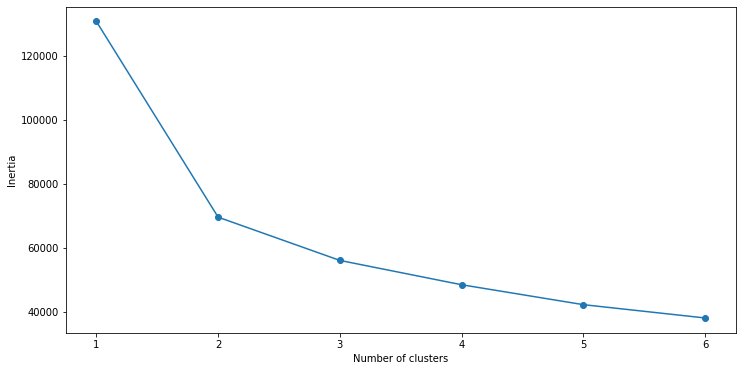

In [63]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

# inertia on the fitted data
kmeans.inertia_

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,7):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,7), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
#take 5 as the best num of clusters

In [64]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
#show how many sampels in each cluster
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


1    96
0    71
Name: cluster, dtype: int64

In [65]:
cls=pd.DataFrame()
cls['data_index']=data_scaled.index.values
cls['cluster']=kmeans.labels_


In [81]:
#show which sampels in each cluster

d=cls[cls.cluster==1]
d

,data_index,cluster
2,2,1
3,3,1
9,10,1
10,11,1
12,13,1
...,...,...
161,194,1
162,195,1
163,196,1
164,197,1


In [67]:
#this line for compere
mer2.head(6)

,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000
1,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923
2,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762
5,15.888000,1.059200,23.040000,1.536000,23.040000,1.536000,21.520000,1.434667,23.040000,1.536000,23.040000,1.536000,23.040000,1.536000,23.040000,1.536000


In [82]:
d=d.iloc[:, :1]

In [87]:
g=d.join(data_scaled.loc[:, ::2]).iloc[:, 1:].iloc[:, :8]
g.head(10)

,kcal_day0,kcal_day1,kcal_day2,kcal_day3,kcal_day4,kcal_day5,kcal_day6,kcal_day7
2,11.976238,0.000000,13.462482,18.596650,6.366770,0.000000,0.000000,0.000000
3,14.840000,3.965647,0.432314,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.235294,13.552941,11.557647,14.569412,20.329412,20.329412,20.329412,1.383529
10,7.143758,6.642667,13.195392,18.501814,10.420119,0.000000,0.000000,0.000000
12,23.287990,19.912009,19.200000,18.640000,17.560000,14.653333,16.746667,19.200000
13,3.355224,3.271642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,14.430132,0.000000,0.000000,16.604479,21.579828,21.579828,4.435854,0.000000
17,18.921000,23.966885,25.531920,17.179650,21.410550,22.500000,22.500000,25.960310
18,2.290909,5.592155,5.236364,3.665455,8.516364,15.421818,15.709091,15.709091
20,0.000000,2.085000,3.545000,0.000000,0.000000,0.000000,0.000000,0.000000


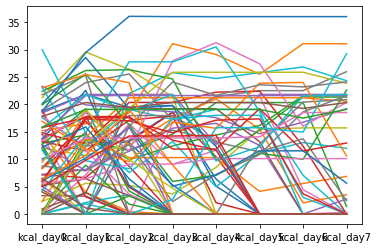

In [88]:
for index, row in g.iterrows():
    row.plot.line()

#x axis for the day
